In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: six>=1.5 in c:\users\mihir\anaconda3\lib\site-packages (from python-dateutil>=2.7.3->pandas) (1.15.0)



In [2]:
pip install mysql-connector-python

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pyparsing>=2.3.1 in c:\users\mihir\anaconda3\lib\site-packages (from matplotlib) (2.4.7)



In [4]:
!pip install --upgrade matplotlib

Requirement already up-to-date: matplotlib in c:\users\mihir\anaconda3\lib\site-packages (3.7.5)


In [5]:
pip install seaborn

In [6]:
import pandas as pd
import mysql.connector
import os

# List of CSV files and their corresponding table names
csv_files = [
    ('customers.csv', 'custom|ers'),
    ('orders.csv', 'orders'),
    ('sellers.csv', 'sellers'),
    ('products.csv', 'products'),
    ('geolocation.csv', 'geolocation'),
    ('payments.csv', 'payments'),
    ('order_items.csv' , 'order_items')
]

# Connect to the MySQL database
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='123456',
    database='ecomercee'
)
cursor = conn.cursor()

# Folder containing the CSV files
folder_path = r'E:\btech\Data Science Projects\New folder\Dataset'

def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)
    
    # Debugging: Check for NaN values
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Generate the CREATE TABLE statement with appropriate data types
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)

    # Insert DataFrame data into the MySQL table
    for _, row in df.iterrows():
        # Convert row to tuple and handle NaN/None explicitly
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

    # Commit the transaction for the current CSV file
    conn.commit()

# Close the connection
conn.close()


Processing customers.csv
NaN values before replacement:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Processing orders.csv
NaN values before replacement:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Processing sellers.csv
NaN values before replacement:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Processing products.csv
NaN values before replacement:
product_id                      0
product category              610
product_name_length           610
product_description_length    610
product_photos_qty            610
prod

#Queries

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

db = mysql.connector.connect(host = "localhost" , username = "root" , password = "123456" , database = "ecomercee")

cur = db.cursor()


# List all unique cities where customers are located.

In [8]:
query  = """select distinct (customer_city) from customers """

cur.execute(query)

data = cur.fetchall()
data

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

# Count the number of orders placed in 2017.

In [9]:
query  = """select count(order_id) from orders where year(order_purchase_timestamp) = 2017 """

cur.execute(query)

data = cur.fetchall()
"Total oders placed in 2017 are" , data[0][0]

('Total oders placed in 2017 are', 135303)

# Find the total sales per category.

In [19]:
query  = """select products.product_category category, round(sum(payments.payment_value),2) sales
from products 
join order_items 
on products.product_id = order_items.product_id
join payments
on payments.order_id = order_items.order_id  

group by category order by sales desc"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data , columns =["Categories", "Sales"])

df



,Categories,Sales
0,bed table bath,46238949.12
1,HEALTH BEAUTY,44749074.22
2,computer accessories,42803922.05
3,Furniture Decoration,38614762.58
4,Watches present,38588850.32
...,...,...
69,PC Gamer,58709.61
70,House Comfort 2,46184.58
71,cds music dvds,32384.61
72,Fashion Children's Clothing,21213.09


In [18]:
query = """ SELECT
    p.product_category AS category,
    ROUND(SUM(oi.price + oi.freight_value), 2) AS total_sales
FROM
    order_items oi
    JOIN products p ON oi.product_id = p.product_id
GROUP BY
    p.product_category
ORDER BY
    total_sales DESC """

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data , columns =["Categories", "Sales"])

df


,Categories,Sales
0,HEALTH BEAUTY,12971232.64
1,Watches present,11749874.47
2,bed table bath,11175135.48
3,sport leisure,10409908.31
4,computer accessories,9533451.58
...,...,...
69,flowers,14390.19
70,House Comfort 2,10535.22
71,cds music dvds,8594.91
72,Fashion Children's Clothing,5988.24


# Calculate the percentage of orders that were paid in installments.

In [22]:
query  = """select (sum(case when payment_installments >= 1 then 1 else 0 end)/ count(*)) * 100 from payments """

cur.execute(query)

data = cur.fetchall()

" percentage of orders that were paid in installments are" , data[0][0]


(' percentage of orders that were paid in installments are',
 Decimal('99.9981'))

# Count the number of customers from each state. 


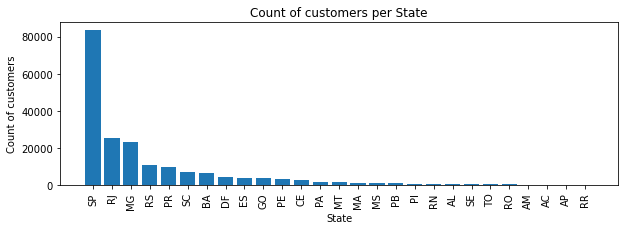

In [37]:
query  = """select customer_state , count(customer_id)  
from customers 
group by customer_state """

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data , columns = ["State" , "Count of customer"])

df = df.sort_values(by = "Count of customer" , ascending = False)
plt.figure(figsize=(10, 3))

plt.bar(df["State"] , df["Count of customer"], width = 0.8)
plt.xticks(rotation = 90)
plt.xlabel("State")
plt.ylabel("Count of customers")
plt.title('Count of customers per State')
plt.show()

In [11]:
query  = """select customer_state , count(customer_id)  
from customers 
group by customer_state """

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data , columns = ["State" , "Count of customer"])
df

,State,Count of customer
0,SP,125238
1,SC,10911
2,MG,34905
3,PR,15135
4,RJ,38556
5,RS,16398
6,PA,2925
7,GO,6060
8,ES,6099
9,BA,10140


# Calculate the number of orders per month in 2018.

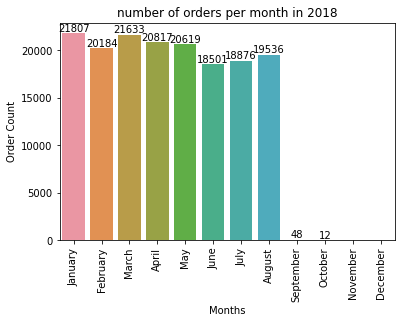

In [12]:
query  = """select monthname(order_purchase_timestamp) as months, count(order_id) as order_count
from orders
where year(order_purchase_timestamp) = 2018
group by months"""

cur.execute(query)

data = cur.fetchall()


df = pd.DataFrame(data, columns = ["months" , "order_count"])
order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

ax = sns.barplot(x = df["months"] , y = df["order_count"] , data = df , order = order)
plt.xlabel('Months')
plt.ylabel('Order Count')
plt.title('number of orders per month in 2018')
plt.xticks(rotation = 90)

ax.bar_label(ax.containers[0])
plt.show()


# Find the average number of products per order, grouped by customer city.

In [5]:
query  = """with count_per_order as 
(select orders.order_id , orders.customer_id, count(order_items.order_id) as order_count
from orders 
join order_items
on orders.order_id = order_items.order_id
group by orders.order_id , orders.customer_id)


select customers.customer_city , round(avg(count_per_order.order_count),2)
from customers 
join count_per_order 
on customers.customer_id = count_per_order.customer_id
group by customers.customer_city"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ["City" , "Averrage products per order"])
df.head(10)

,City,Averrage products per order
0,sao jose dos campos,18.22
1,indaial,17.85
2,treze tilias,20.36
3,sao paulo,18.50
4,rio de janeiro,18.35
5,mario campos,21.33
6,guariba,16.00
7,cuiaba,19.16
8,franca,20.03
9,tocos,16.00


# Calculate the percentage of total revenue contributed by each product category.

In [17]:
query = """ select upper(products.product_category) category, round((sum(payments.payment_value)/ (select sum(payment_value) from payments)) * 100 , 2)as sales_percentage
from products 
join order_items 
on products.product_id = order_items.product_id
join payments
on payments.order_id = order_items.order_id  
group by category
order by sales_percentage desc """

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ["Category" , "Percentage distribution"])
df.head(10)

,Category,Percentage distribution
0,bed table bath,96.28
1,HEALTH BEAUTY,93.18
2,computer accessories,89.13
3,Furniture Decoration,80.40
4,Watches present,80.35
5,sport leisure,78.26
6,housewares,61.55
7,automotive,47.91
8,Garden tools,47.13
9,Cool Stuff,43.83


In [ ]:
query = """ SELECT
    p.product_category AS category,
    ROUND((SUM(oi.price + oi.freight_value)/ (select sum(payment_value) from payments)) * 100 ,2)) AS total_sales
FROM
    order_items oi
    JOIN products p ON oi.product_id = p.product_id
GROUP BY
    p.product_category
ORDER BY
    total_sales DESC  """

# Identify the correlation between product price and the number of times a product has been purchased.

In [3]:
query = """ Select products.product_category , count(order_items.product_id),
round(avg(order_items.price),2)
From products
join order_items 
on products.product_id = order_items.product_id
group by products.product_category """


cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ["Category" , "order_count" , "price"])
df.head(10)

,Category,order_count,price
0,HEALTH BEAUTY,154720,130.16
1,sport leisure,138256,114.34
2,Cool Stuff,60736,167.36
3,computer accessories,125232,116.51
4,Watches present,95856,201.14
5,housewares,111424,90.79
6,electronics,44272,57.91
7,None,25648,112.00
8,toys,65872,117.55
9,bed table bath,177840,93.30


In [7]:
query = """select products.product_category, 
count(order_items.product_id),
round(avg(order_items.price),2)
from products join order_items
on products.product_id = order_items.product_id
group by products.product_category"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns = ["Category", "order_count","price"])

import numpy as np
# Correlation
arr1 = df["order_count"]
arr2 = df["price"]

np.corrcoef([arr1 , arr2])

array([[ 1.        , -0.10631514],
       [-0.10631514,  1.        ]])

# Calculate the total revenue generated by each seller, and rank them by revenue.

In [10]:
query = """ select *, dense_rank() over(order by revenue desc) from
(select order_items.seller_id , round(sum(payments.payment_value),2) as revenue
from order_items join payments
on order_items.order_id = payments.order_id
group by order_items.seller_id) as a
 """
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns = ["Seller_id", "Revenue","Rank"])
df 


,Seller_id,Revenue,Rank
0,7c67e1448b00f6e969d365cea6b010ab,8114670.52,1
1,1025f0e2d44d7041d6cf58b6550e0bfa,4931552.64,2
2,4a3ca9315b744ce9f8e9374361493884,4819924.32,3
3,1f50f920176fa81dab994f9023523100,4644054.72,4
4,53243585a1d6dc2643021fd1853d8905,4558449.29,5
...,...,...,...
3090,ad14615bdd492b01b0d97922e87cb87f,307.36,3076
3091,702835e4b785b67a084280efca355756,296.96,3077
3092,4965a7002cca77301c82d3f91b82e1a9,261.76,3078
3093,77128dec4bec4878c37ab7d6169d6f26,243.52,3079


# Calculate the moving average of order values for each customer over their order history.

In [9]:
query = """ select distinct(customer_id), order_purchase_timestamp, payment,
avg(payment) over(partition by customer_id order by order_purchase_timestamp
rows between 2 preceding and current row) as mov_avg
from
(select orders.customer_id, orders.order_purchase_timestamp, 
payments.payment_value as payment
from payments join orders
on payments.order_id = orders.order_id) as a """

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data)
df 

,0,1,2,3
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42,195.419998
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,179.35,179.350006
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,107.01,107.010002
...,...,...,...,...
125179,fffecc9f79fd8c764f843e9951b11341,2018-03-29 16:59:26,71.23,30.070001
125180,fffeda5b6d849fbd39689bb92087f431,2018-05-22 13:36:02,63.13,63.130001
125181,ffff42319e9b2d713724ae527742af25,2018-06-13 16:57:05,214.13,214.130005
125182,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,45.50,45.500000


# Calculate the cumulative sales per month for each year

In [10]:
query = """ select years, months , payment, sum(payment)
over(order by years, months) cumulative_sales from 
(select year(orders.order_purchase_timestamp) as years,
month(orders.order_purchase_timestamp) as months,
round(sum(payments.payment_value),2) as payment from orders join payments
on orders.order_id = payments.order_id
group by years, months order by years, months) as a """

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data)
df 

,0,1,2,3
0,2016,9,6306.00,6.306000e+03
1,2016,10,1477262.00,1.483568e+06
2,2016,12,490.50,1.484058e+06
3,2017,1,3462201.00,4.946260e+06
4,2017,2,7297700.24,1.224396e+07
5,2017,3,11246589.99,2.349055e+07
6,2017,4,10444700.74,3.393525e+07
7,2017,5,14822970.50,4.875822e+07
8,2017,6,12781909.51,6.154013e+07
9,2017,7,14809572.99,7.634970e+07


# Identify the top 3 customers who spent the most money in each year.

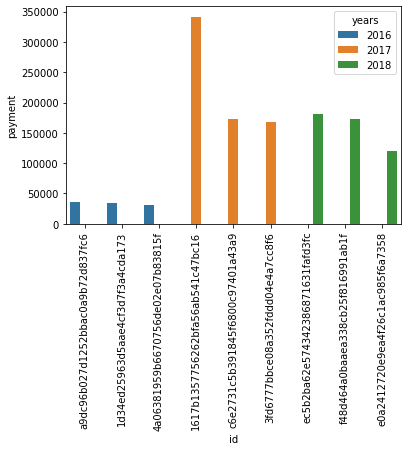

In [13]:
query = """select years, customer_id, payment, d_rank
from
(select year(orders.order_purchase_timestamp) years,
orders.customer_id,
sum(payments.payment_value) payment,
dense_rank() over(partition by year(orders.order_purchase_timestamp)
order by sum(payments.payment_value) desc) d_rank
from orders join payments 
on payments.order_id = orders.order_id
group by year(orders.order_purchase_timestamp),
orders.customer_id) as a
where d_rank <= 3 ;"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["years","id","payment","rank"])
sns.barplot(x = "id", y = "payment", data = df, hue = "years")
plt.xticks(rotation = 90)
plt.show()